In [18]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

In [32]:
# Data is from https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data 
df = pd.read_csv("/Users/yeonkyoungkim/Desktop/DailyDelhiClimateTrain.csv", parse_dates=["date"]) 
df = df[["date", "meantemp","humidity","wind_speed"]] 
df.rename(columns={"date": "ds", "meantemp": "y","humidity":"A","wind_speed":"B"}, inplace=True)

In [33]:
df

,ds,y,A,B
0,2013-01-01,10.000000,84.500000,0.000000
1,2013-01-02,7.400000,92.000000,2.980000
2,2013-01-03,7.166667,87.000000,4.633333
3,2013-01-04,8.666667,71.333333,1.233333
4,2013-01-05,6.000000,86.833333,3.700000
...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826
1458,2016-12-29,15.238095,87.857143,6.000000
1459,2016-12-30,14.095238,89.666667,6.266667
1460,2016-12-31,15.052632,87.000000,7.325000


In [35]:
future_regressors_df = pd.DataFrame(data={'A': df['A'], 'B': df['B']})

In [36]:
model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     # Dimension of hidden layers of AR-Net
    ar_sparsity=None,  # Sparcity in the AR coefficients
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True,
    log_level=None, # Determines the logging level of the logger object
)


In [37]:
model = model.add_future_regressor(name='A')
model = model.add_future_regressor(name='B')

In [46]:

metrics = model.fit(df, validate_each_epoch=True, freq="D") 
future = model.make_future_dataframe(df, periods=365,regressors_df=future_regressors_df, n_historic_predictions=len(df)) 
forecast = model.predict(future)

Epoch[40/40]: 100%|██████████| 40/40 [00:03<00:00, 13.24it/s, SmoothL1Loss=0.00134, MAE=1.38, RegLoss=0, MAE_val=1.11, SmoothL1Loss_val=0.000897]


In [51]:
data

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


In [47]:
# future = model.make_future_dataframe(df=df, regressors_df=future_regressors_df, periods=365)
forecast = model.predict(df=future)

In [48]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,future_regressors_additive,future_regressor_A,future_regressor_B
0,2013-01-01,10.000000,10.441562,0.441562,28.134136,-10.716271,0.090176,-7.066478,-7.058906,-0.007572
1,2013-01-02,7.400000,9.761770,2.361770,28.147930,-10.752549,0.111514,-7.745123,-7.723125,-0.021999
2,2013-01-03,7.166667,9.978313,2.811647,28.161724,-10.781266,-0.091829,-7.310316,-7.280313,-0.030003
3,2013-01-04,8.666667,11.465198,2.798531,28.175520,-10.802271,-0.001675,-5.906376,-5.892833,-0.013543
4,2013-01-05,6.000000,10.084173,4.084173,28.189314,-10.815428,0.001325,-7.291036,-7.265552,-0.025484
...,...,...,...,...,...,...,...,...,...,...
1822,2017-12-28,NaN,17.465780,NaN,34.702927,-10.482814,-0.091829,-6.662505,-6.649304,-0.013200
1823,2017-12-29,NaN,18.349392,NaN,34.707886,-10.548717,-0.001675,-5.808101,-5.774750,-0.033351
1824,2017-12-30,NaN,18.348606,NaN,34.712845,-10.608069,0.001325,-5.757494,-5.724143,-0.033351
1825,2017-12-31,NaN,17.271358,NaN,34.717800,-10.660599,-0.130833,-6.655012,-6.616094,-0.038919


Text(0.5, 1.0, 'Mean Temperature in Delhi')

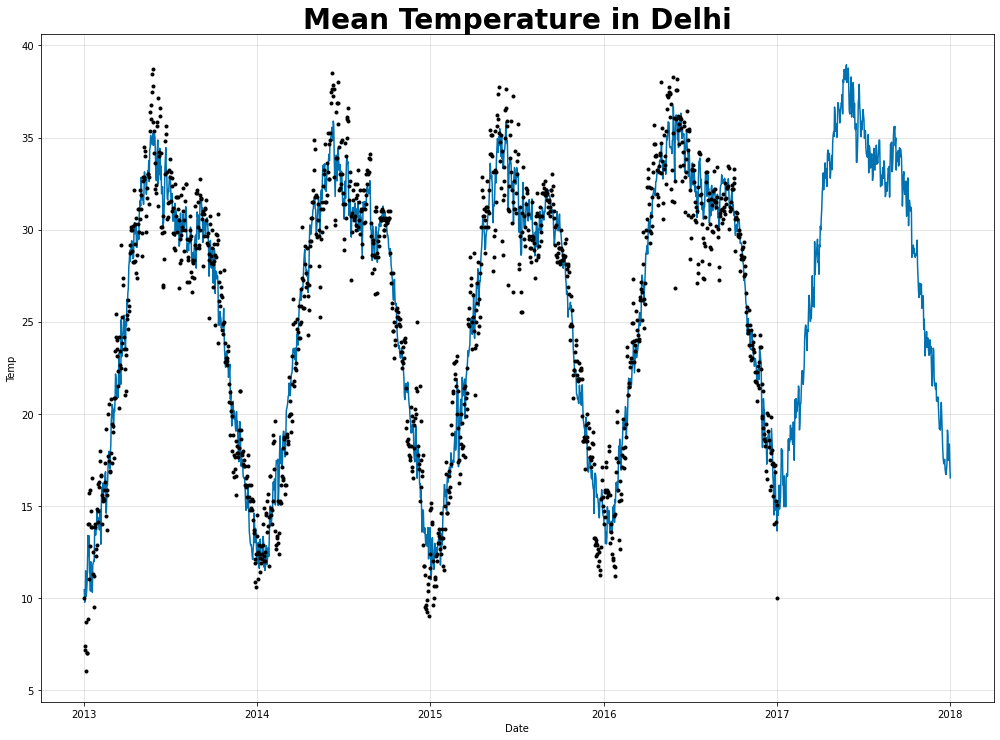

In [49]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="Temp", ax=ax)
ax.set_title("Mean Temperature in Delhi", fontsize=28, fontweight="bold")

In [55]:
data.rename(columns={"date": "ds", "meantemp": "y"}, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [56]:
model2 = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     # Dimension of hidden layers of AR-Net
    ar_sparsity=None,  # Sparcity in the AR coefficients
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True,
    log_level=None, # Determines the logging level of the logger object
)



In [58]:
metrics = model2.fit(data, validate_each_epoch=True, freq="D") 
future = model2.make_future_dataframe(data, periods=365, n_historic_predictions=len(data)) 
forecast2 = model2.predict(future)

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 13.70it/s, SmoothL1Loss=0.00184, MAE=1.62, RegLoss=0, MAE_val=1.57, SmoothL1Loss_val=0.00193]


Text(0.5, 1.0, 'Mean Temperature in Delhi')

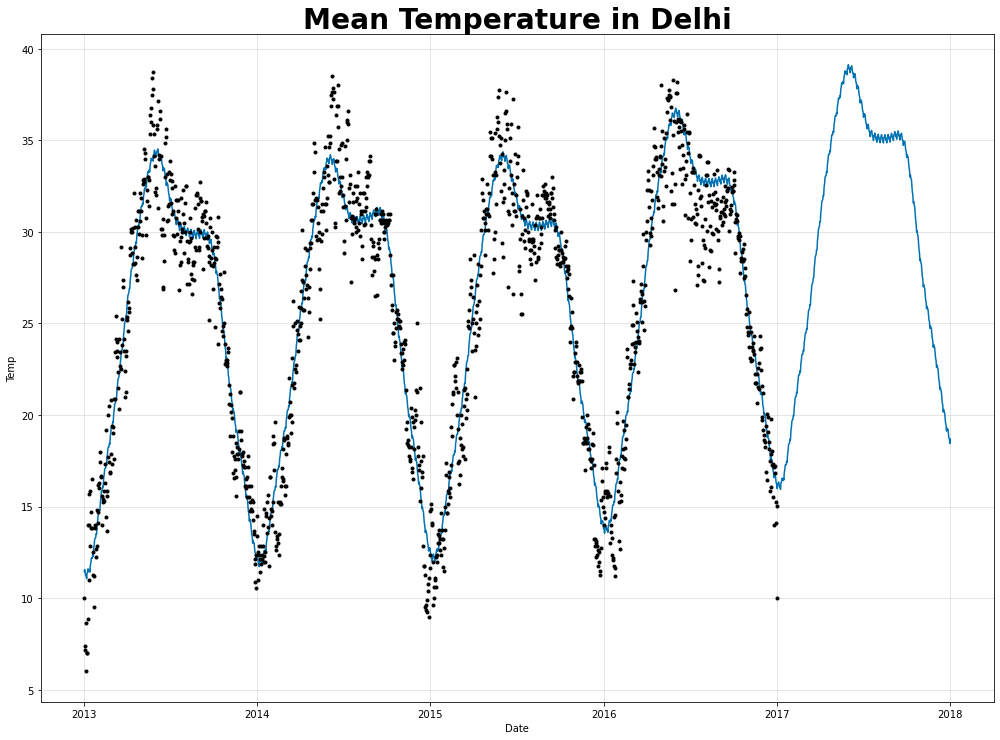

In [59]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model2.plot(forecast2, xlabel="Date", ylabel="Temp", ax=ax)
ax.set_title("Mean Temperature in Delhi", fontsize=28, fontweight="bold")